In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\meetu\Downloads\Programming\DeepLearning_projects\Churn_Prediction\churnpredenv_dataset\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 0)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = df.iloc[:,:-1].values
y = df['Exited'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [9]:
import tensorflow
from tensorflow.keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_shape = x_train[0].shape))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

c:\Users\meetu\Downloads\Programming\DeepLearning_projects\Churn_Prediction\churnpredenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           121 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,002 (11.73 KB)

 Trainable params: 3,002 (11.73 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

history = model.fit( x_train, y_train, epochs = 25, validation_split = 0.2 )

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7830 - loss: 0.5421 - val_accuracy: 0.8044 - val_loss: 0.4495
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8199 - loss: 0.4290 - val_accuracy: 0.8306 - val_loss: 0.4116
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3769 - val_accuracy: 0.8400 - val_loss: 0.4047
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.3698 - val_accuracy: 0.8388 - val_loss: 0.3984
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3580 - val_accuracy: 0.8419 - val_loss: 0.4002
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3549 - val_accuracy: 0.8425 - val_loss: 0.3890
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.3444 - val_accuracy: 0.8450 - val_loss: 0.3880
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8509 - loss: 0.3525 - val_accuracy: 0.

In [13]:
model.layers[1].get_weights()

[array([[ 0.2295624 , -0.06848886,  0.34002626, -0.02406958,  0.15890157,
         -0.04739454, -0.08679577, -0.01030613, -0.20841794, -0.12972614,
         -0.00216261,  0.15538369, -0.2302595 , -0.11126747, -0.21121633,
         -0.01593038,  0.06000274, -0.25939074,  0.2759083 , -0.08435734,
         -0.008391  , -0.00943919,  0.22277738, -0.16361585, -0.04963256,
          0.11080734,  0.114802  , -0.29332048, -0.40232354,  0.09670962,
         -0.29885677, -0.30818388, -0.0685756 , -0.40701035,  0.32119933,
          0.06497562,  0.01489804, -0.4017386 , -0.3598578 , -0.34689882,
         -0.2021658 , -0.20274965,  0.13356927,  0.18659955, -0.24420403,
         -0.00100177, -0.4098261 , -0.30336174,  0.2951223 , -0.437396  ,
          0.08745512, -0.09192615,  0.0633386 ,  0.1734555 , -0.15553723,
          0.18646976, -0.2609834 , -0.13844705, -0.23664688, -0.27044454,
         -0.06453817, -0.5511096 , -0.22160694,  0.26033095],
        [ 0.38437364,  0.24165896,  0.13243279,  0

In [14]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [16]:
from sklearn.metrics import accuracy_score
print("accuracy score: ", accuracy_score(y_test, y_pred))

accuracy score:  0.8625


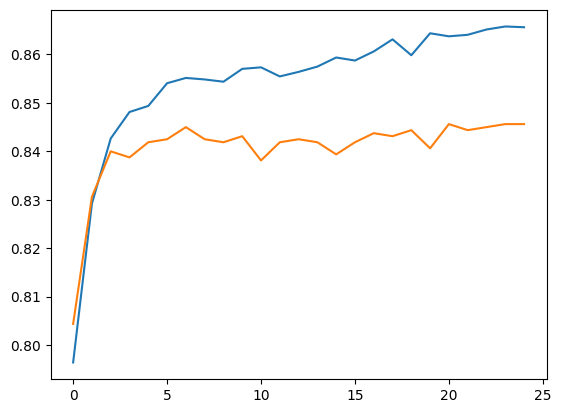

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

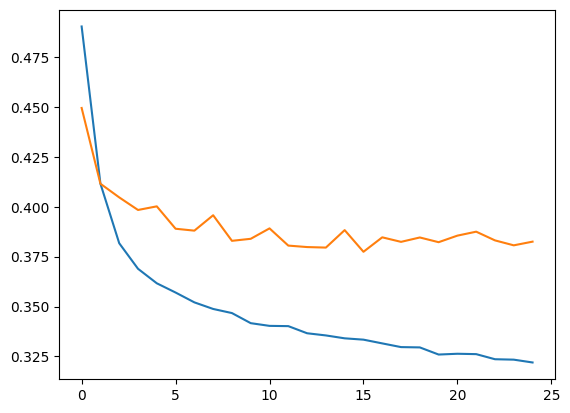

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])